Model Accuracy: 0.8708609271523179
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       173
           2       0.83      0.50      0.62        20
           3       0.78      0.93      0.85        76
           4       0.57      0.39      0.46        33

    accuracy                           0.87       302
   macro avg       0.78      0.70      0.73       302
weighted avg       0.86      0.87      0.86       302



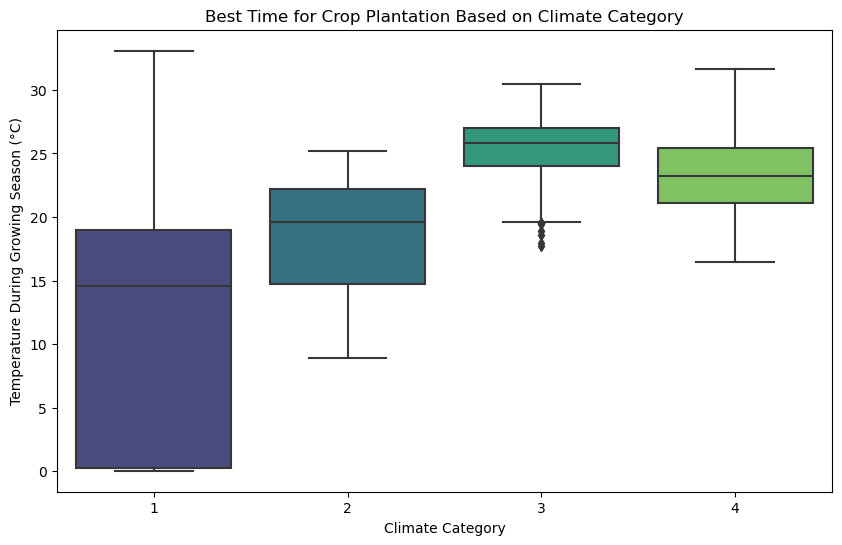

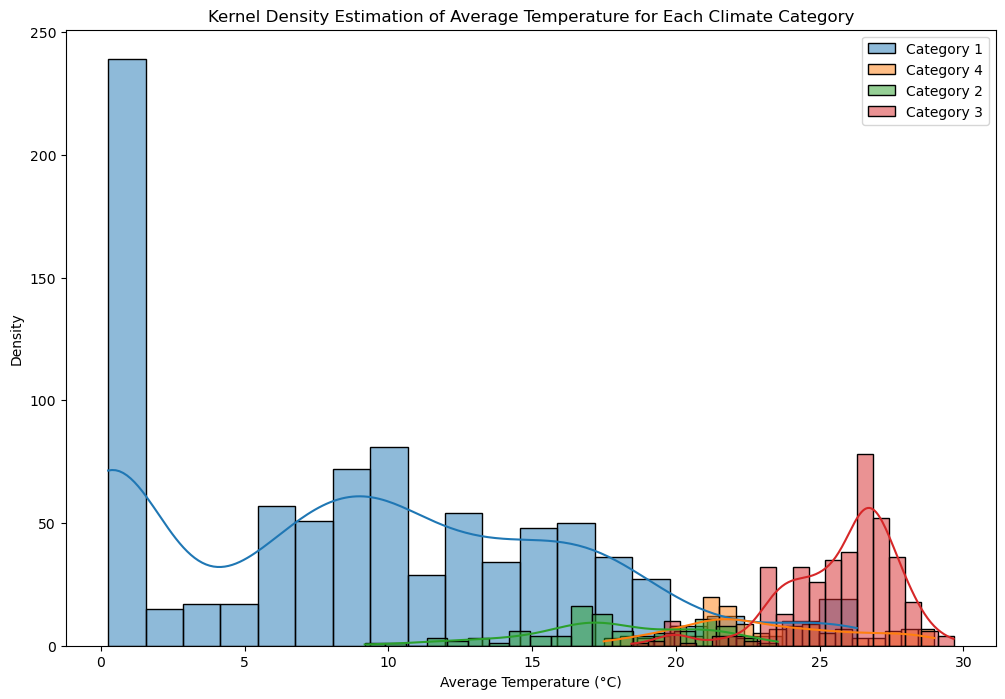

Suitability Prediction for the Crop: 1


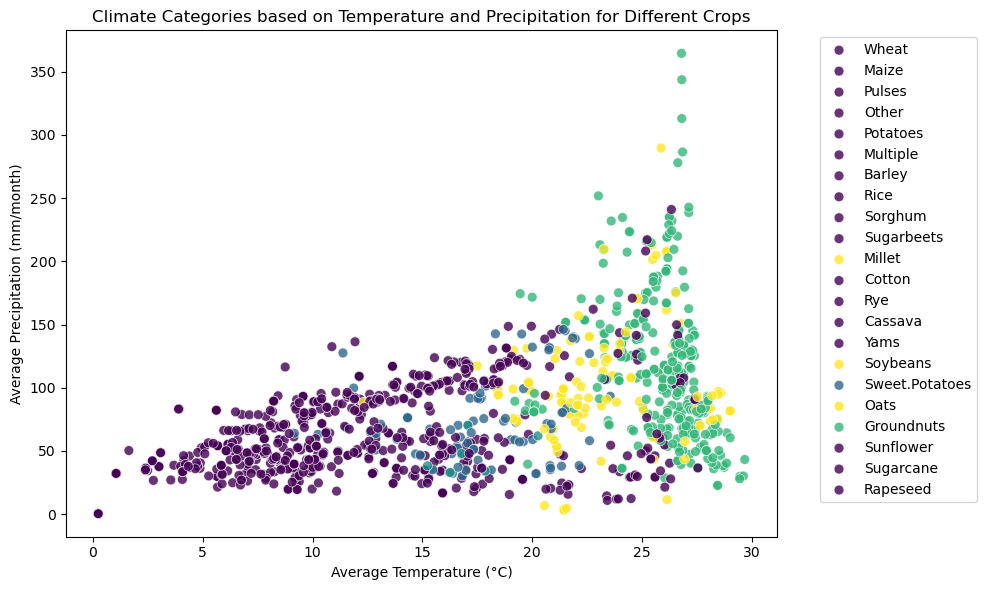

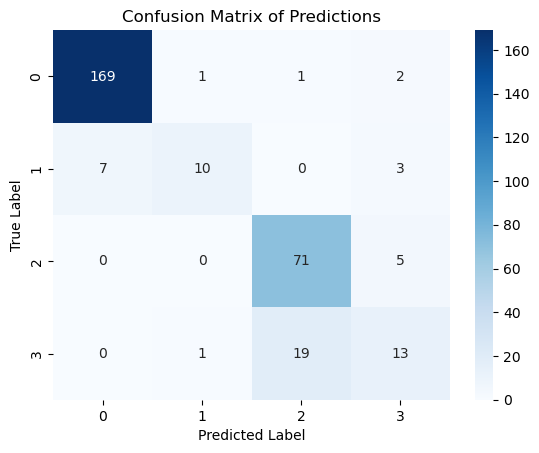

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

# All_data_with_climate.csv is the complete dataset
data = pd.read_csv('All_data_with_climate.csv')

# Data_for_analysis.csv is the smaller version of the dataset
#data = pd.read_csv('Data_for_analysis.csv')


data.fillna(value=np.random.random(), inplace=True) 


bins = [0, 1, 2, 3, 4]  
labels = [1, 2, 3, 4]  
data['climate.category'] = pd.cut(data['climate.category'], bins=bins, labels=labels)


features = ['temp.average', 'precip.average', 'temp.min', 'precip.min', 'temp.max', 'precip.max', 'temp.growing.season', 'precip.growing.season']
target = 'climate.category'


warnings.filterwarnings("ignore", message="X has feature names, but LogisticRegression was fitted without feature names")


X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)


model.fit(X_train_scaled, y_train)


predictions = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


print(f"Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


# Best Time for Crop Plantation - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='climate.category', y='temp.growing.season', data=data, palette='viridis')
plt.xlabel('Climate Category')
plt.ylabel('Temperature During Growing Season (°C)')
plt.title('Best Time for Crop Plantation Based on Climate Category')
plt.show()


# Kernel Density Estimation of Average Temperature for Each Climate Category
plt.figure(figsize=(12, 8))
for category in data['climate.category'].unique():
    subset = data[data['climate.category'] == category]
    sns.histplot(subset['temp.average'], bins=20, kde=True, label=f'Category {category}')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Average Temperature for Each Climate Category')
plt.legend()
plt.show()


# Here in the sample we can choose which crop we want to visualize
crop_data = data[features].sample(1)
crop_prediction = model.predict(crop_data)
print(f"Suitability Prediction for the Crop: {crop_prediction[0]}")


# Scatter Plot for Different Crops
plt.figure(figsize=(10, 6))
for crop in data['Crop'].unique():
    crop_subset = data[data['Crop'] == crop]
    plt.scatter(crop_subset['temp.average'], crop_subset['precip.average'],
                c=crop_subset['climate.category'].astype('category').cat.codes,  
                cmap='viridis', s=50, alpha=0.8, edgecolors='w', linewidths=0.5, label=crop)

plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Precipitation (mm/month)')
plt.title('Climate Categories based on Temperature and Precipitation for Different Crops')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()


joblib.dump(model, 'crop_suitability_logistic_regression_model.joblib')


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix of Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
